In [177]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Repulsive part of DPD potential

/Users/stephenthomas/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


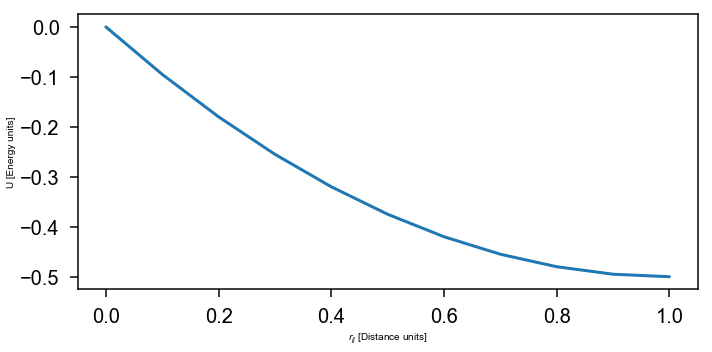

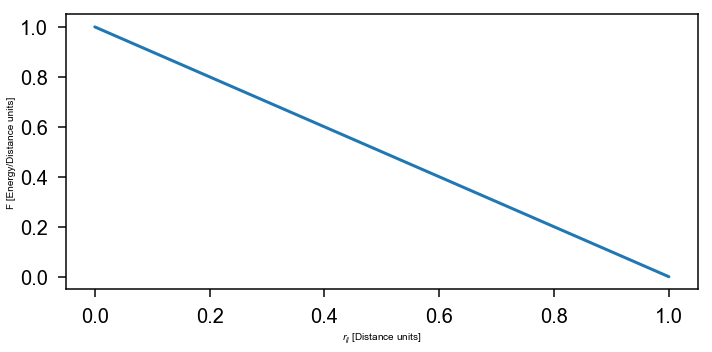

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
A=1.0
x=np.arange(0.0,1.1,0.1)
U = -A*x+(A*x**2/2) 
plt.figure(figsize=(10,5))
plt.xlabel('$r_{ij}$ [Distance units]')
plt.ylabel('U [Energy units]')
plt.plot(x,U)
plt.figure(figsize=(10,5))
F = A*(1-x)
plt.xlabel('$r_{ij}$ [Distance units]')
plt.ylabel('F [Energy/Distance units]')
plt.plot(x,F)

## Units

1. Kacar, G., Peters, E. A. J. F. & de With, G. Mesoscopic simulations for the molecular and network structure of a thermoset polymer. Soft Matter 9, 5785 (2013).

In [278]:
N_epoxy = 7610 # DGEBA
N_amine = 3044 # DETA
v_A = 1/0.0097 # Angstrom^3
v_B = 1/0.0066
v_C = 1/0.0087
v_F = 1/0.0098
v_D = 1/0.0200
v_E = 1/0.0134
v_epoxy = N_epoxy*((2*v_A) + (6*v_B) + (3*v_C) + (2*v_F))
v_amine = N_amine*((2*v_D)+v_E)
#print(v_epoxy,v_amine)
vol = (v_epoxy + v_amine)/(N_epoxy*(13)+N_amine*(3))
print(vol)# Angstroms^3
bead_num_density = 3
r_dpd = (bead_num_density*vol)**(1/3)
print(r_dpd)#Angstroms

#L = 

122.11524234012909
7.155341678151165


In [277]:
T_star = 1
mol = 6.023e+23 # atoms per mole
E = 6e-12 #Joules
D = 12*(1e-9) #nm
M = 60*(1e-3) #kDa = 1 g/mol
kB = 1.38e-23#Joules per Kelvin

print('1 D=',round(D,10),'m')
print('1 E=',E,'J')
print('1 M=',M,'kg/mol')
print('kB=',kB,'J/K')

T = T_star*E/kB
print('1 T=',round(T,3),'Kelvin')

tau = (M*D/E)**(1/2)
print('1 tau=',round(tau,3),'secs')

delta_t = 0.01 #tau
delta_t = delta_t*tau

print('delta_t=',round(delta_t,3),'secs')

1 D= 1.2e-08 m
1 E= 6e-12 J
1 M= 0.06 kg/mol
kB= 1.38e-23 J/K
1 T= 434782608695.652 Kelvin
1 tau= 10.954 secs
delta_t= 0.11 secs


In [11]:
M_epoxy = 3*58.07+6*94.11+3*44.09+2*60.09
print(M_epoxy,'g/mol')

991.3199999999999 g/mol


## Determining Energy unit from Temperature mapping

The dimensionless temperature $T^\star$ is related to energy unit according to 

$T^\star = \frac{k_BT}{ε} \implies ε = \frac{k_BT}{T^\star}$

So if we know can relate a $T^\star$ to an experimental temperature $T$, we can calculate the Energy unit corresponding to it. From (Wang, X. & Gillham, J. K.(1991)), we know the relation between $ln(\frac{k_2}{k_1})$ and $T$.

$ln(\frac{k_2}{k_1}) = 3.2674 - 1879.0(\frac{1}{T})$

Below we connect $ln(\frac{k_2}{k_1})$ and the secondary bond weight factor $\alpha$ which controls the increased activation energy $E_a$. 

$k_2 = Ae^{-\frac{\alpha E_a}{kT}}, \alpha > 1$

$k_1 = Ae^{-\frac{E_a}{kT}}$

$\frac{k2}{k1} = e^{\frac{E_a(1-\alpha)}{kT}}$

$ln(\frac{k2}{k1}) = {\frac{E_a(1-\alpha)}{kT}}$

since $T^\star$ is usually represented as $kT$

$ln(\frac{k2}{k1}) = {\frac{E_a(1-\alpha)}{T^\star}}$

or 

$\alpha = 1-\frac{ln(\frac{k2}{k1})T^\star}{E_a}$

Then,

$\frac{E_a(1-\alpha)}{T^\star} = 3.2674 - 1879.0(\frac{1}{T})$

or,

$T^\star = \frac{1879.0T}{3.2674 T - E_a(1-\alpha)}$

Given a $T$ and $ln(\frac{k2}{k1})$ from experiments, we can now estimate the $\alpha$ and $T^\star$

TODO: solve for $\alpha$ from

$ln(\frac{k2}{k1}) = {\frac{E_a(1-\alpha)}{\frac{1879.0T}{3.2674 T - E_a(1-\alpha)}}}$

$\alpha = $

We know from the previous reference that a reasonable range of $ln(\frac{k_2}{k_1})$ considered in experiments is from -1.0 to 2.0. Below we look at the range of dimensionless temperatures $T^\star$ which corresponds to this range of $ln(\frac{k_2}{k_1})$

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

k_b = 1.38064852e-23

def alpha_to_k2k1(alpha,kT,E_a):
    val = E_a*(1-alpha)/kT
    #print(val,sbw,kT)
    return math.exp(val)

def dimless_T_to_Kelvin(T_star,energy_unit):
    return T_star*energy_unit/k_b

def KelvinT_to_dimlessT(T,Ea,alpha):
    return 1879.*T_star/(3.2674*T_star - Ea*(1-alpha))

def get_alpha(k2,k1,T,Ea):
    T_star = KelvinT_to_dimlessT(T,Ea,)

KelvinT_to_dimlessT(0.0023,1.0,2)

440.31494586867876

/Users/stephenthomas/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


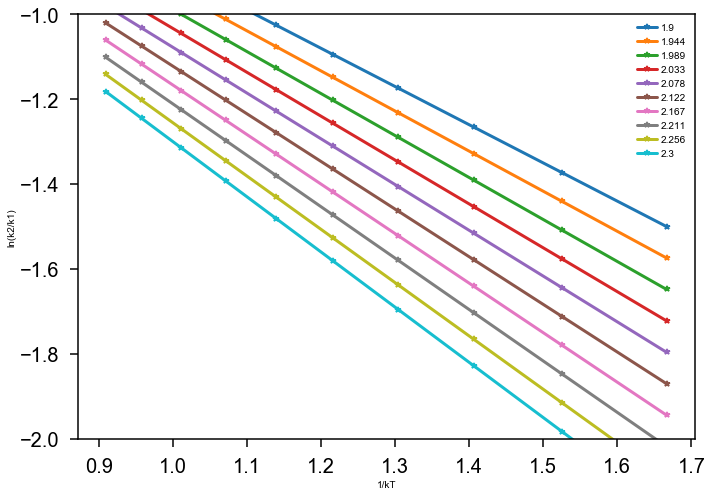

In [238]:
#plt.figure(figsize=(10,7))
kTs = np.linspace(0.6,1.1,10)
#print(kTs)
#print(kTs_inv)
alphas = np.linspace(1.9,2.3,10)
for kT in kTs:
    k2_k1 = []
    for alpha in alphas:
        k2_k1.append(alpha_to_k2k1(alpha,kT,1.0))

kTs_inv = 1/kTs
plt.figure(figsize=(10,7))
for alpha in alphas:
    k2_k1 = []
    for kT in kTs:
        kratio = alpha_to_k2k1(alpha,kT,1.0)
        k2_k1.append(math.log(kratio))
    plt.plot(kTs_inv,k2_k1,marker='*',label=round(alpha,3))
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-2.0,-1.0))
plt.xlabel('1/kT')
plt.ylabel('ln(k2/k1)')
plt.legend()
plt.show()

        #

In [318]:
alpha = 2.167
k_b = 1.38064852e-23
AV = 6.022e23

T_star1 = round(1/0.909,2)
T1 = round(1/0.0023,2)
E1 = (k_b*T1/T_star1)
T_star2 = round(1/1.52,2)
T2 = round(1/0.0027,2)
E2 = (k_b*T2/T_star2)
print('T(K)','\t\t',' T*','\t\t','1ε in J')
print('====','\t\t','====','\t\t','=======')
print(T1,'\t\t',T_star1,'\t\t','{:.2E}'.format(E1))
print(T2,'\t\t',T_star2,'\t\t','{:.2E}'.format(E2))

E_av = ((E1+E2)/2)

print('\nEnergy conversion: \t\t\t1 ε  : {:.2E} J'.format(E_av))
print('Temperature conversion conversion: \t1 T* : {:0.2f} K'.format(dimless_T_to_Kelvin(1,E_av)))

box_L = 36.8403167724
box_M = 50000
rho = box_M/box_L**3

# To calculate the mass conversions, I approximated the molar mass of amine, expoxy, and PES toughener 

# 4,4 DDS (Amine) (A type)
# 248.3 http://www.chemicalbook.com/ChemicalProductProperty_EN_cb0152851.htm

# TGDDM (Epoxy) (B type)
# 422.52 http://www.chemicalbook.com/ChemicalProductProperty_EN_cb9719976.htm

# PES (Toughner)
# 442.516 http://www.chemnet.com/Suppliers/33300/Polyethersulfone--1075074.html (and some math)
# TODO: ask Mike what this math is?

# PES
M_C = 442.516*10*2000/AV   
# TGDDM 
M_B = 422.52*20000/AV  
#4,4 DDS
M_A = 248.3*10000/AV

M_total = M_C+M_A+M_B # grams

cM = M_total/box_M
cM = cM*0.001 # kg
print("Mass Conversion: \t\t\t1 M  : {:.2E} kg".format(cM))

# For determining the distance unit in DPD, 
# we use the parametrisation used in (Kacar, G., Peters, E. A. J. F. Soft Matter, 2013)
r_DPD = 7.14e-10 #m

print("Length Conversion: \t\t\t1 D  : {:.2E} m".format(r_DPD))
print("Box Density: \t\t\t\t  ρ  : {:0.2f} g/cm^3".format(M_total/(box_L*r_DPD*1e2)**3))

# Time
time = (cM*r_DPD**2/E_av)**(1/2)
print("Time Conversion: \t\t\t1 τ  : {:.2E} s".format(time))
dt = time*1e-2
print("Time Step: \t\t\t    0.01 τ  : {:.4E} s".format(dt))

T(K) 		  T* 		 1ε in J
==== 		 ==== 		 =======
434.78 		 1.1 		 5.46E-21
370.37 		 0.66 		 7.75E-21

Energy conversion: 			1 ε  : 6.60E-21 J
Temperature conversion conversion: 	1 T* : 478.21 K
Mass Conversion: 			1 M  : 6.57E-25 kg
Length Conversion: 			1 D  : 7.14E-10 m
Box Density: 				  ρ  : 1.81 g/cm^3
Time Conversion: 			1 τ  : 7.12E-12 s
Time Step: 			    0.001 τ  : 7.1227E-14 s


$\tau$

In [314]:
box_length = (box_L*r_DPD)*1e9
box_length#nm

26.303986175493602

In [316]:
sim_time = 10000*500*dt
sim_time#secs

3.561358133585272e-07

In [320]:
math.log(0.33)

-1.1086626245216111

In [321]:
1/0.33

3.0303030303030303

In [326]:
Ea = 1
alpha = 2.167
E2minusE1 = Ea*(alpha-1)*E_av #Joules
E2minusE1 = E2minusE1*1.439e20 #kcal/mole
E2minusE1

1.1087509006439735